Decide which metrics(attributes) to use to assess the best team performance in the regular season. These don’t have to be backed by hard-evidence, but try to use some simple graphs to show the relation between a metric and a team's win percentage. For instance, the  Pearson R metric should be able to accomplish this. 

Resource: https://www.teamrankings.com/nba/stats/ 

#### What does Pearson R Mean? 

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
import matplotlib.pyplot as plt

# Metric #1: Average Biggest Lead

In [9]:
drb_pct_dir = '../Cleaned_Data/abl'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'drb_pct' directory
team_files = [f for f in os.listdir(drb_pct_dir) if f.endswith('.csv')]

drb_pct_data = pd.DataFrame()

# Combine drb_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    drb_pct_file = os.path.join(drb_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both drb_pct and win_pct files
    drb_pct_year = pd.read_csv(drb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    drb_pct_year = drb_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'drb_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(drb_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    drb_pct_data = pd.concat([drb_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(drb_pct_data.head(5))

# Pearson correlation coefficient
correlation = drb_pct_data['drb_pct'].corr(drb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  drb_pct  win_pct    Team
0  2005     12.2    0.575  Denver
1  2012     12.6    0.562  Denver
2  2020     13.0    0.662  Denver
3  2011     14.3    0.586  Denver
4  2007     12.3    0.529  Denver
Pearson Correlation Coefficient: 0.75989


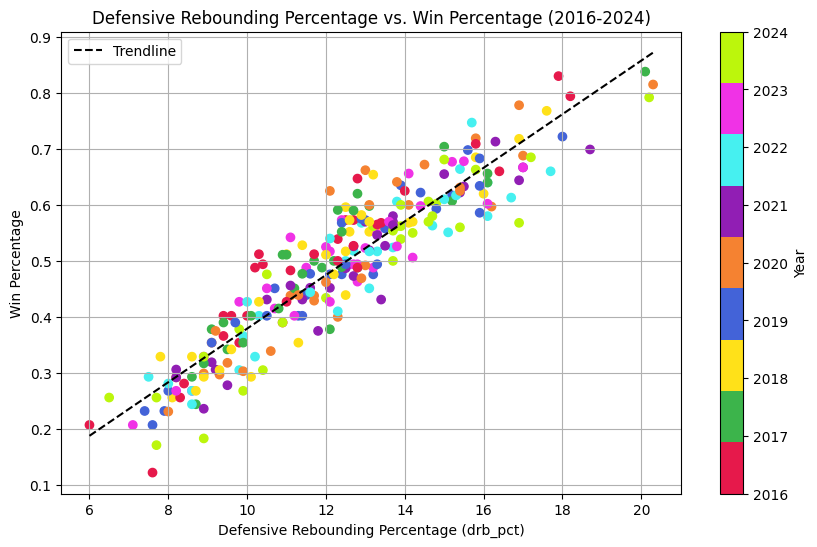

In [10]:
# Filter data for years 2016-2024 (three-point revolution)
drb_pct_data['Year'] = drb_pct_data['Year'].astype(int)
drb_pct_data = drb_pct_data[drb_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(drb_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
drb_pct_data['year_color'] = drb_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    drb_pct_data['drb_pct'], 
    drb_pct_data['win_pct'], 
    c=drb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(drb_pct_data['drb_pct'])
sorted_drb_pct = drb_pct_data['drb_pct'].values[sorted_indices]
sorted_win_pct = drb_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_drb_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_drb_pct, p(sorted_drb_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Rebounding Percentage (drb_pct)')
plt.ylabel('Win Percentage')
plt.title('Defensive Rebounding Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()


# Metric 2: Assists Per Posession

In [46]:

ast_pp_dir = '../Cleaned_Data/ast_pp'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'ast_pp' directory
team_files = [f for f in os.listdir(ast_pp_dir) if f.endswith('.csv')]

ast_pp_data = pd.DataFrame()

# Combine ast_pp and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    ast_pp_file = os.path.join(ast_pp_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both ast_pp and win_pct files
    ast_pp_year = pd.read_csv(ast_pp_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    ast_pp_year = ast_pp_year[['Year', 'Statistic']].rename(columns={'Statistic': 'ast_pp'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(ast_pp_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    ast_pp_data = pd.concat([ast_pp_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(ast_pp_data.head(5))

# Pearson correlation coefficient
correlation = ast_pp_data['ast_pp'].corr(ast_pp_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  ast_pp  win_pct    Team
0  2019   0.267    0.635  Denver
1  2017   0.249    0.488  Denver
2  2013   0.242    0.671  Denver
3  2021   0.263    0.622  Denver
4  2018   0.249    0.561  Denver
Pearson Correlation Coefficient: 0.29193


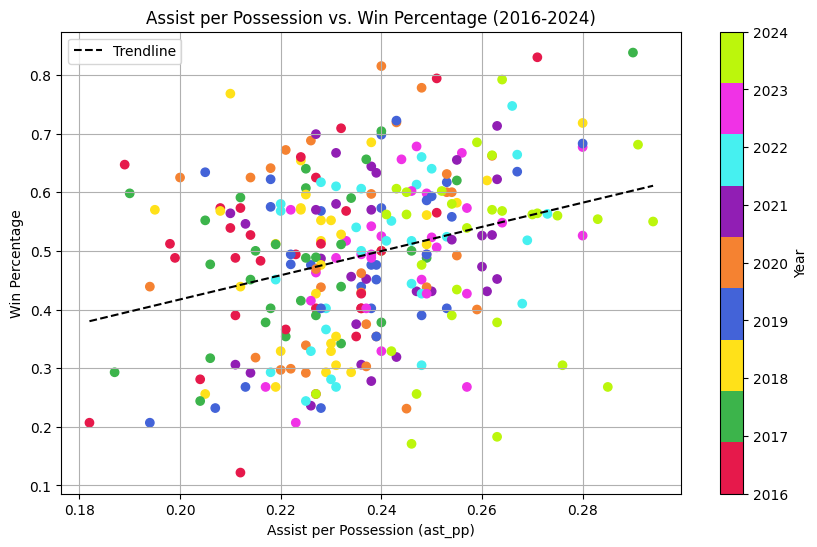

In [47]:
# Filter data for years 2016-2024 (three-point revolution)
ast_pp_data['Year'] = ast_pp_data['Year'].astype(int)
ast_pp_data = ast_pp_data[ast_pp_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(ast_pp_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
ast_pp_data['year_color'] = ast_pp_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    ast_pp_data['ast_pp'], 
    ast_pp_data['win_pct'], 
    c=ast_pp_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(ast_pp_data['ast_pp'])
sorted_ast_pp = ast_pp_data['ast_pp'].values[sorted_indices]
sorted_win_pct = ast_pp_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_ast_pp, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_ast_pp, p(sorted_ast_pp), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Assist per Possession (ast_pp)')
plt.ylabel('Win Percentage')
plt.title('Assist per Possession vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()


# Metric 3: Average Scoring Margin

In [11]:

avg_scr_mgn_dir = '../Cleaned_Data/average_scoring_margin'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'average_scoring_margin' directory
team_files = [f for f in os.listdir(avg_scr_mgn_dir) if f.endswith('.csv')]

avg_scr_mgn_data = pd.DataFrame()

# Combine average_scoring_margin and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    avg_scr_mgn_file = os.path.join(avg_scr_mgn_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both average_scoring_margin and win_pct files
    avg_scr_mgn_year = pd.read_csv(avg_scr_mgn_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    avg_scr_mgn_year = avg_scr_mgn_year[['Year', 'Statistic']].rename(columns={'Statistic': 'avg_scr_mgn'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(avg_scr_mgn_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    avg_scr_mgn_data = pd.concat([avg_scr_mgn_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(avg_scr_mgn_data.head(5))

# Pearson correlation coefficient
correlation = avg_scr_mgn_data['avg_scr_mgn'].corr(avg_scr_mgn_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  avg_scr_mgn  win_pct    Team
0  2017          0.5    0.488  Denver
1  2005          1.3    0.575  Denver
2  2024          4.3    0.681  Denver
3  2023          4.3    0.677  Denver
4  2020          3.0    0.662  Denver
Pearson Correlation Coefficient: 0.96163


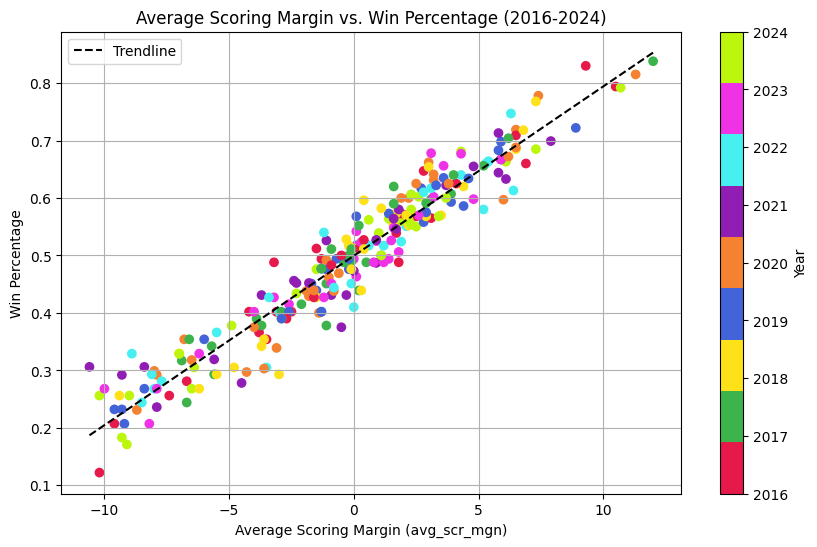

In [12]:
# Filter data for years 2016-2024 (three-point revolution)
avg_scr_mgn_data['Year'] = avg_scr_mgn_data['Year'].astype(int)
avg_scr_mgn_data = avg_scr_mgn_data[avg_scr_mgn_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(avg_scr_mgn_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
avg_scr_mgn_data['year_color'] = avg_scr_mgn_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    avg_scr_mgn_data['avg_scr_mgn'], 
    avg_scr_mgn_data['win_pct'], 
    c=avg_scr_mgn_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(avg_scr_mgn_data['avg_scr_mgn'])
sorted_avg_scr_mgn = avg_scr_mgn_data['avg_scr_mgn'].values[sorted_indices]
sorted_win_pct = avg_scr_mgn_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_avg_scr_mgn, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_avg_scr_mgn, p(sorted_avg_scr_mgn), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Average Scoring Margin (avg_scr_mgn)')
plt.ylabel('Win Percentage')
plt.title('Average Scoring Margin vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 4: Block Percentage

In [25]:

blk_pct_dir = '../Cleaned_Data/blk_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'blk_pct' directory
team_files = [f for f in os.listdir(avg_scr_mgn_dir) if f.endswith('.csv')]

blk_pct_data = pd.DataFrame()

# Combine blk_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    blk_pct_file = os.path.join(blk_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both blk_pct and win_pct files
    blk_pct_year = pd.read_csv(blk_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensureboth dataframes have the necessary columns
    blk_pct_year = blk_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'blk_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(blk_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    blk_pct_data = pd.concat([blk_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(blk_pct_data.head(5))

# Pearson correlation coefficient
correlation = blk_pct_data['blk_pct'].corr(blk_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  blk_pct  win_pct    Team
0  2016    0.057    0.402  Denver
1  2013    0.073    0.671  Denver
2  2017    0.045    0.488  Denver
3  2023    0.051    0.677  Denver
4  2005    0.074    0.575  Denver
Pearson Correlation Coefficient: 0.27686


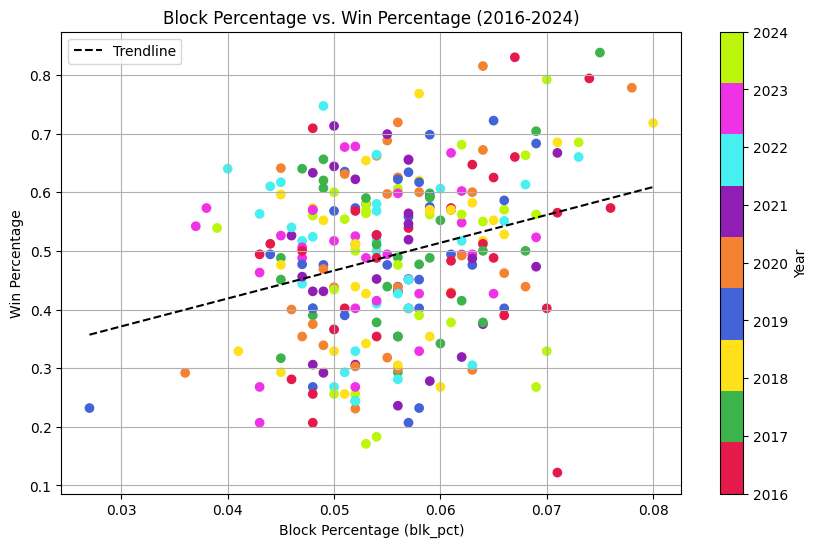

In [26]:
# Filter data for years 2016-2024 (three-point revolution)
blk_pct_data['Year'] = blk_pct_data['Year'].astype(int)
blk_pct_data = blk_pct_data[blk_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(blk_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
blk_pct_data['year_color'] = blk_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    blk_pct_data['blk_pct'], 
    blk_pct_data['win_pct'], 
    c=blk_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(blk_pct_data['blk_pct'])
sorted_blk_pct = blk_pct_data['blk_pct'].values[sorted_indices]
sorted_win_pct = blk_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_blk_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_blk_pct, p(sorted_blk_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Block Percentage (blk_pct)')
plt.ylabel('Win Percentage')
plt.title('Block Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 5: Defensive Efficiency

In [56]:

def_eff_dir = '../Cleaned_Data/defensive_efficiency'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'defensive_efficiency' directory
team_files = [f for f in os.listdir(def_eff_dir) if f.endswith('.csv')]

def_eff_data = pd.DataFrame()

# Combine defensive_efficiency and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    def_eff_file = os.path.join(def_eff_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both defensive_efficiency and win_pct files
    def_eff_year = pd.read_csv(def_eff_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensureboth dataframes have the necessary columns
    def_eff_year = def_eff_year[['Year', 'Statistic']].rename(columns={'Statistic': 'def_eff'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(def_eff_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    def_eff_data = pd.concat([def_eff_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(def_eff_data.head(5))

# Pearson correlation coefficient
correlation = def_eff_data['def_eff'].corr(def_eff_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  def_eff  win_pct    Team
0  2016    1.052    0.402  Denver
1  2012    1.026    0.562  Denver
2  2015    1.044    0.366  Denver
3  2020    1.061    0.662  Denver
4  2011    1.039    0.586  Denver
Pearson Correlation Coefficient: -0.48428


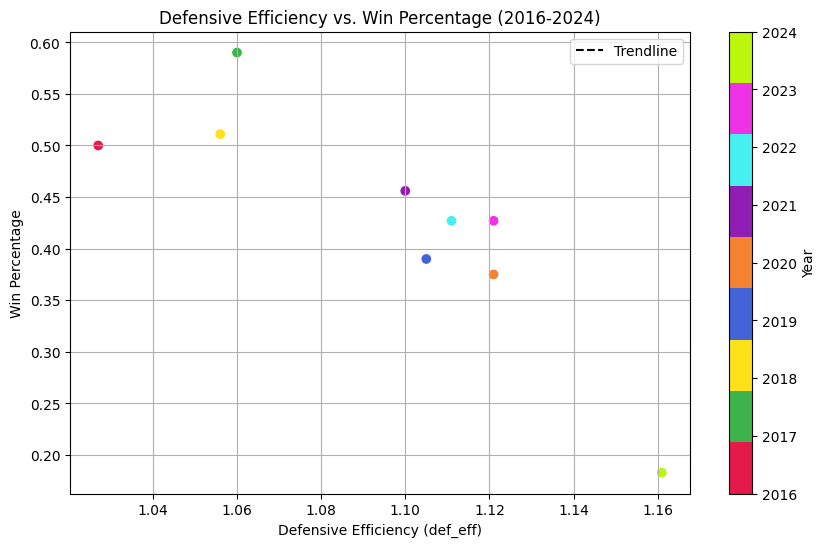

In [24]:
# Filter data for years 2016-2024 (three-point revolution)
def_eff_data['Year'] = def_eff_data['Year'].astype(int)
def_eff_data = def_eff_data[def_eff_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(def_eff_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
def_eff_data['year_color'] = def_eff_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    def_eff_data['def_eff'], 
    def_eff_data['win_pct'], 
    c=def_eff_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(def_eff_data['def_eff'])
sorted_def_eff = def_eff_data['def_eff'].values[sorted_indices]
sorted_win_pct = def_eff_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_def_eff, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_def_eff, p(sorted_def_eff), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Efficiency (def_eff)')
plt.ylabel('Win Percentage')
plt.title('Defensive Efficiency vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 6: Defensive Rebounding Percentage

In [28]:

drb_pct_dir = '../Cleaned_Data/drb_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'drb_pct' directory
team_files = [f for f in os.listdir(drb_pct_dir) if f.endswith('.csv')]

drb_pct_data = pd.DataFrame()

# Combine drb_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    drb_pct_file = os.path.join(drb_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both drb_pct and win_pct files
    drb_pct_year = pd.read_csv(drb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    drb_pct_year = drb_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'drb_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(drb_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    drb_pct_data = pd.concat([drb_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(drb_pct_data.head(5))

# Pearson correlation coefficient
correlation = drb_pct_data['drb_pct'].corr(drb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  drb_pct  win_pct    Team
0  2013    0.719    0.671  Denver
1  2012    0.734    0.562  Denver
2  2007    0.718    0.529  Denver
3  2020    0.770    0.662  Denver
4  2008    0.722    0.581  Denver
Pearson Correlation Coefficient: 0.22263


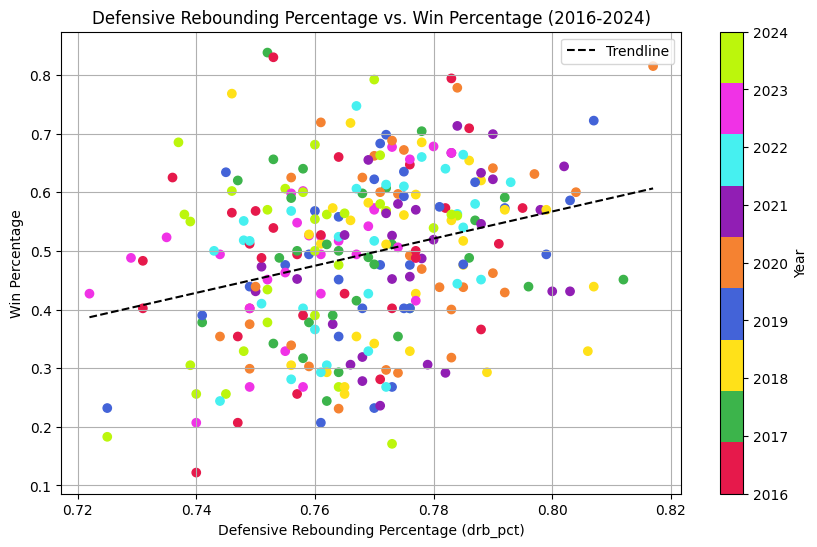

In [29]:
# Filter data for years 2016-2024 (three-point revolution)
drb_pct_data['Year'] = drb_pct_data['Year'].astype(int)
drb_pct_data = drb_pct_data[drb_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(drb_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
drb_pct_data['year_color'] = drb_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    drb_pct_data['drb_pct'], 
    drb_pct_data['win_pct'], 
    c=drb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(drb_pct_data['drb_pct'])
sorted_drb_pct = drb_pct_data['drb_pct'].values[sorted_indices]
sorted_win_pct = drb_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_drb_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_drb_pct, p(sorted_drb_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Rebounding Percentage (drb_pct)')
plt.ylabel('Win Percentage')
plt.title('Defensive Rebounding Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 7: Effective Field Goal Percentage

In [30]:

efg_pct_dir = '../Cleaned_Data/efg_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'efg_pct' directory
team_files = [f for f in os.listdir(efg_pct_dir) if f.endswith('.csv')]

efg_pct_data = pd.DataFrame()

# Combine efg_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    efg_pct_file = os.path.join(efg_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both efg_pct and win_pct files
    efg_pct_year = pd.read_csv(efg_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    efg_pct_year = efg_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'efg_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(efg_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    efg_pct_data = pd.concat([efg_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(efg_pct_data.head(5))

# Pearson correlation coefficient
correlation = efg_pct_data['efg_pct'].corr(efg_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  efg_pct  win_pct    Team
0  2018    0.536    0.561  Denver
1  2007    0.498    0.529  Denver
2  2012    0.510    0.562  Denver
3  2023    0.570    0.677  Denver
4  2022    0.555    0.563  Denver
Pearson Correlation Coefficient: 0.44415


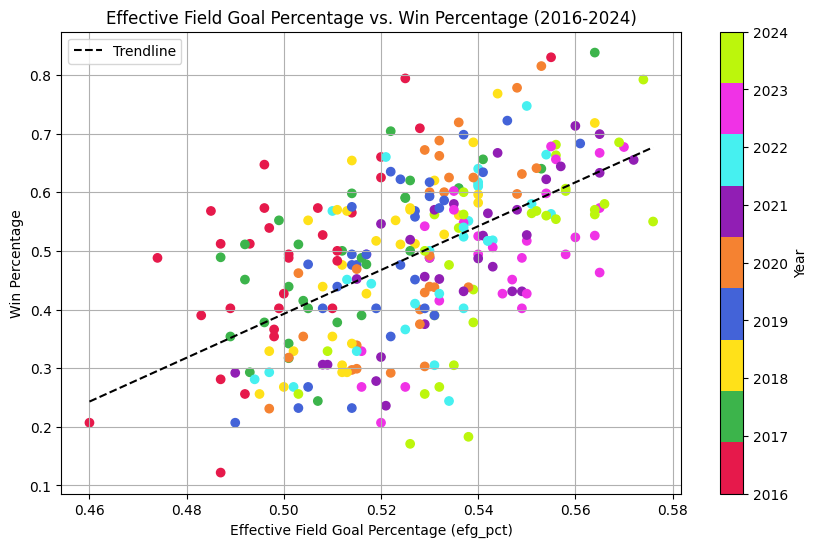

In [31]:
# Filter data for years 2016-2024 (three-point revolution)
efg_pct_data['Year'] = efg_pct_data['Year'].astype(int)
efg_pct_data = efg_pct_data[efg_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(efg_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
efg_pct_data['year_color'] = efg_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    efg_pct_data['efg_pct'], 
    efg_pct_data['win_pct'], 
    c=efg_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(efg_pct_data['efg_pct'])
sorted_efg_pct = efg_pct_data['efg_pct'].values[sorted_indices]
sorted_win_pct = efg_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_efg_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_efg_pct, p(sorted_efg_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Effective Field Goal Percentage (efg_pct)')
plt.ylabel('Win Percentage')
plt.title('Effective Field Goal Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 8: Floor Percentage

In [32]:

flr_pct_dir = '../Cleaned_Data/flr_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'flr_pct' directory
team_files = [f for f in os.listdir(flr_pct_dir) if f.endswith('.csv')]

flr_pct_data = pd.DataFrame()

# Combine flr_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    flr_pct_file = os.path.join(flr_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both flr_pct and win_pct files
    flr_pct_year = pd.read_csv(flr_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    flr_pct_year = flr_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'flr_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(flr_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    flr_pct_data = pd.concat([flr_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(flr_pct_data.head(5))

# Pearson correlation coefficient
correlation = flr_pct_data['flr_pct'].corr(flr_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  flr_pct  win_pct    Team
0  2018    0.503    0.561  Denver
1  2023    0.529    0.677  Denver
2  2012    0.513    0.562  Denver
3  2020    0.504    0.662  Denver
4  2024    0.525    0.681  Denver
Pearson Correlation Coefficient: 0.61884


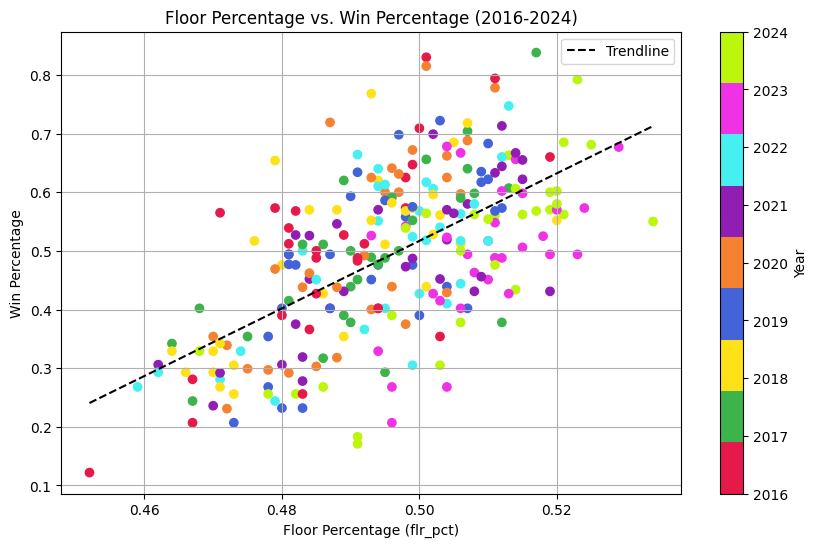

In [35]:
# Filter data for years 2016-2024 (three-point revolution)
flr_pct_data['Year'] = flr_pct_data['Year'].astype(int)
flr_pct_data = flr_pct_data[flr_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(flr_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
flr_pct_data['year_color'] = flr_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    flr_pct_data['flr_pct'], 
    flr_pct_data['win_pct'], 
    c=flr_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(flr_pct_data['flr_pct'])
sorted_flr_pct = flr_pct_data['flr_pct'].values[sorted_indices]
sorted_win_pct = flr_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_flr_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_flr_pct, p(sorted_flr_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Floor Percentage (flr_pct)')
plt.ylabel('Win Percentage')
plt.title('Floor Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 9: Free Throw Rate

In [36]:

ftr_dir = '../Cleaned_Data/ftr'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'ftr' directory
team_files = [f for f in os.listdir(ftr_dir) if f.endswith('.csv')]

ftr_data = pd.DataFrame()

# Combine ftr and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    ftr_file = os.path.join(ftr_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both ftr and win_pct files
    ftr_year = pd.read_csv(ftr_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    ftr_year = ftr_year[['Year', 'Statistic']].rename(columns={'Statistic': 'ftr'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(ftr_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    ftr_data = pd.concat([ftr_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(ftr_data.head(5))

# Pearson correlation coefficient
correlation = ftr_data['ftr'].corr(ftr_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year    ftr  win_pct    Team
0  2013  0.234    0.671  Denver
1  2018  0.200    0.561  Denver
2  2015  0.215    0.366  Denver
3  2007  0.260    0.529  Denver
4  2006  0.257    0.517  Denver
Pearson Correlation Coefficient: 0.13687


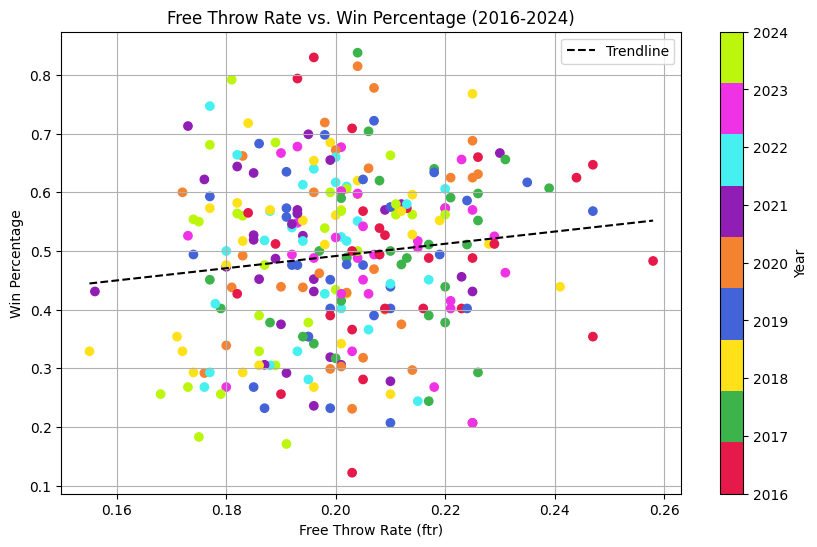

In [38]:
# Filter data for years 2016-2024 (three-point revolution)
ftr_data['Year'] = ftr_data['Year'].astype(int)
ftr_data = ftr_data[ftr_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(ftr_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
ftr_data['year_color'] = ftr_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    ftr_data['ftr'], 
    ftr_data['win_pct'], 
    c=ftr_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(ftr_data['ftr'])
sorted_ftr = ftr_data['ftr'].values[sorted_indices]
sorted_win_pct = ftr_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_ftr, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_ftr, p(sorted_ftr), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Free Throw Rate (ftr)')
plt.ylabel('Win Percentage')
plt.title('Free Throw Rate vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 10: Opponent Floor Percentage

In [39]:

opp_flr_pct_dir = '../Cleaned_Data/opp_flr_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'opp_flr_pct' directory
team_files = [f for f in os.listdir(opp_flr_pct_dir) if f.endswith('.csv')]

opp_flr_pct_data = pd.DataFrame()

# Combine opp_flr_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    opp_flr_pct_file = os.path.join(opp_flr_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both opp_flr_pct and win_pct files
    opp_flr_pct_year = pd.read_csv(opp_flr_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    opp_flr_pct_year = opp_flr_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'opp_flr_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(opp_flr_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    opp_flr_pct_data = pd.concat([opp_flr_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(opp_flr_pct_data.head(5))

# Pearson correlation coefficient
correlation = opp_flr_pct_data['opp_flr_pct'].corr(opp_flr_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  opp_flr_pct  win_pct    Team
0  2022        0.503    0.563  Denver
1  2018        0.499    0.561  Denver
2  2012        0.485    0.562  Denver
3  2024        0.507    0.681  Denver
4  2015        0.503    0.366  Denver
Pearson Correlation Coefficient: -0.61484


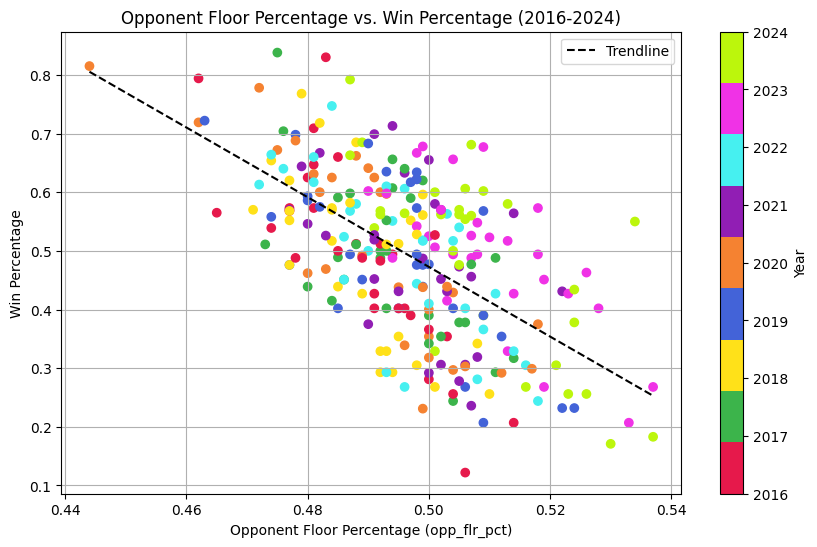

In [40]:
# Filter data for years 2016-2024 (three-point revolution)
opp_flr_pct_data['Year'] = opp_flr_pct_data['Year'].astype(int)
opp_flr_pct_data = opp_flr_pct_data[opp_flr_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(opp_flr_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
opp_flr_pct_data['year_color'] = opp_flr_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    opp_flr_pct_data['opp_flr_pct'], 
    opp_flr_pct_data['win_pct'], 
    c=opp_flr_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(opp_flr_pct_data['opp_flr_pct'])
sorted_opp_flr_pct = opp_flr_pct_data['opp_flr_pct'].values[sorted_indices]
sorted_win_pct = opp_flr_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_opp_flr_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_opp_flr_pct, p(sorted_opp_flr_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Opponent Floor Percentage (opp_flr_pct)')
plt.ylabel('Win Percentage')
plt.title('Opponent Floor Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 11: Opponent Effective Field Goal Percentage

In [41]:

opp_efg_dir = '../Cleaned_Data/opponent_efg_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'opponent_efg_pct' directory
team_files = [f for f in os.listdir(opp_efg_dir) if f.endswith('.csv')]

opp_efg_data = pd.DataFrame()

# Combine opponent_efg_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    opp_efg_file = os.path.join(opp_efg_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both opponent_efg_pct and win_pct files
    opp_efg_year = pd.read_csv(opp_efg_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    opp_efg_year = opp_efg_year[['Year', 'Statistic']].rename(columns={'Statistic': 'opp_efg'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(opp_efg_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    opp_efg_data = pd.concat([opp_efg_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(opp_efg_data.head(5))

# Pearson correlation coefficient
correlation = opp_efg_data['opp_efg'].corr(opp_efg_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  opp_efg  win_pct    Team
0  2023    0.538    0.677  Denver
1  2015    0.504    0.366  Denver
2  2012    0.503    0.562  Denver
3  2010    0.498    0.625  Denver
4  2024    0.528    0.681  Denver
Pearson Correlation Coefficient: -0.41408


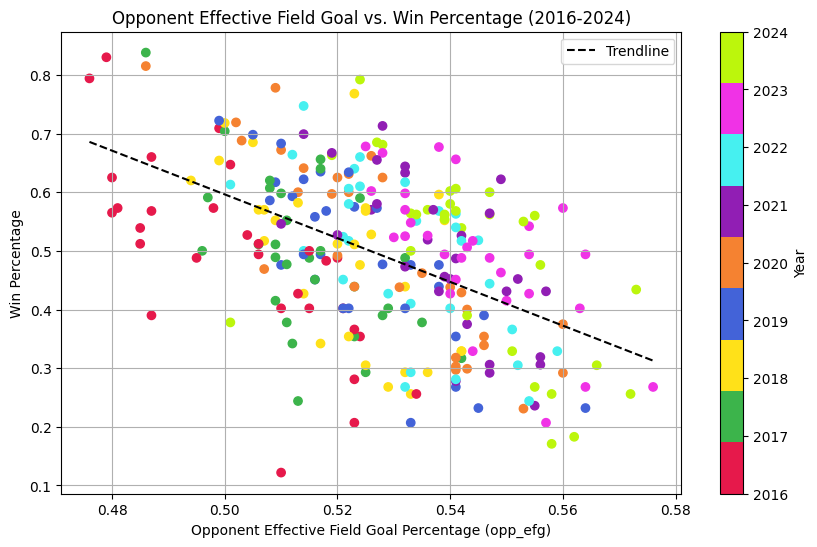

In [42]:
# Filter data for years 2016-2024 (three-point revolution)
opp_efg_data['Year'] = opp_efg_data['Year'].astype(int)
opp_efg_data = opp_efg_data[opp_efg_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(opp_efg_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
opp_efg_data['year_color'] = opp_efg_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    opp_efg_data['opp_efg'], 
    opp_efg_data['win_pct'], 
    c=opp_efg_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(opp_efg_data['opp_efg'])
sorted_opp_efg = opp_efg_data['opp_efg'].values[sorted_indices]
sorted_win_pct = opp_efg_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_opp_efg, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_opp_efg, p(sorted_opp_efg), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Opponent Effective Field Goal Percentage (opp_efg)')
plt.ylabel('Win Percentage')
plt.title('Opponent Effective Field Goal vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 12: Offensive Rebounding Percentage

In [43]:

orb_pct_dir = '../Cleaned_Data/orb_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'drb_pct' directory
team_files = [f for f in os.listdir(orb_pct_dir) if f.endswith('.csv')]

orb_pct_data = pd.DataFrame()

# Combine orb_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    orb_pct_file = os.path.join(orb_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both orb_pct and win_pct files
    orb_pct_year = pd.read_csv(orb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    orb_pct_year = orb_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'orb_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(orb_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    orb_pct_data = pd.concat([orb_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(orb_pct_data.head(5))

# Pearson correlation coefficient
correlation = orb_pct_data['orb_pct'].corr(orb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  orb_pct  win_pct    Team
0  2016    0.258    0.402  Denver
1  2012    0.283    0.562  Denver
2  2018    0.257    0.561  Denver
3  2021    0.247    0.622  Denver
4  2010    0.261    0.625  Denver
Pearson Correlation Coefficient: 0.00578


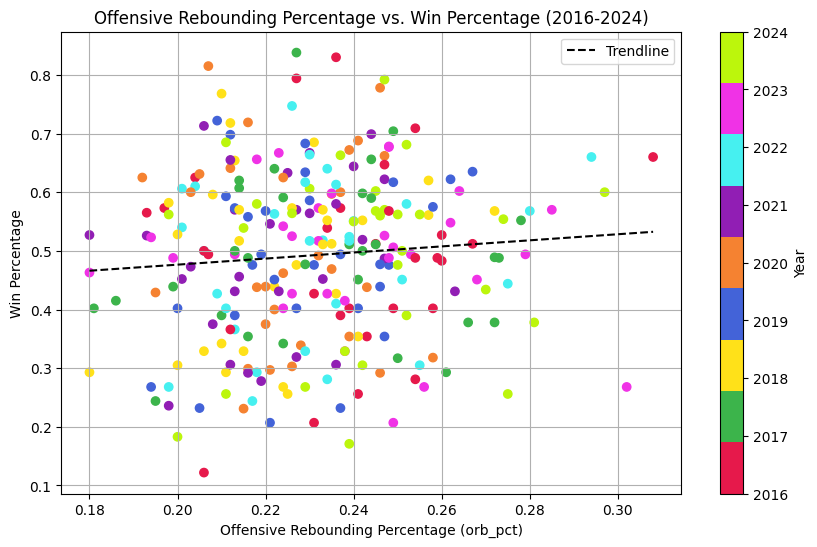

In [44]:
# Filter data for years 2016-2024 (three-point revolution)
orb_pct_data['Year'] = orb_pct_data['Year'].astype(int)
orb_pct_data = orb_pct_data[orb_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(orb_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
orb_pct_data['year_color'] = orb_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    orb_pct_data['orb_pct'], 
    orb_pct_data['win_pct'], 
    c=orb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(orb_pct_data['orb_pct'])
sorted_orb_pct = orb_pct_data['orb_pct'].values[sorted_indices]
sorted_win_pct = orb_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_orb_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_orb_pct, p(sorted_orb_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Offensive Rebounding Percentage (orb_pct)')
plt.ylabel('Win Percentage')
plt.title('Offensive Rebounding Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 13: Personal Fouls Per Defensive Play

In [45]:

pfs_pct_dir = '../Cleaned_Data/pfs_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'pfs_pct' directory
team_files = [f for f in os.listdir(pfs_pct_dir) if f.endswith('.csv')]

pfs_pct_data = pd.DataFrame()

# Combine pfs_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    pfs_pct_file = os.path.join(pfs_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both drb_pct and win_pct files
    pfs_pct_year = pd.read_csv(pfs_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    pfs_pct_year = pfs_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'pfs_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(pfs_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    pfs_pct_data = pd.concat([pfs_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(pfs_pct_data.head(5))

# Pearson correlation coefficient
correlation = pfs_pct_data['pfs_pct'].corr(pfs_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  pfs_pct  win_pct    Team
0  2021    0.175    0.622  Denver
1  2004    0.203    0.506  Denver
2  2014    0.203    0.439  Denver
3  2024    0.165    0.681  Denver
4  2011    0.193    0.586  Denver
Pearson Correlation Coefficient: -0.09565


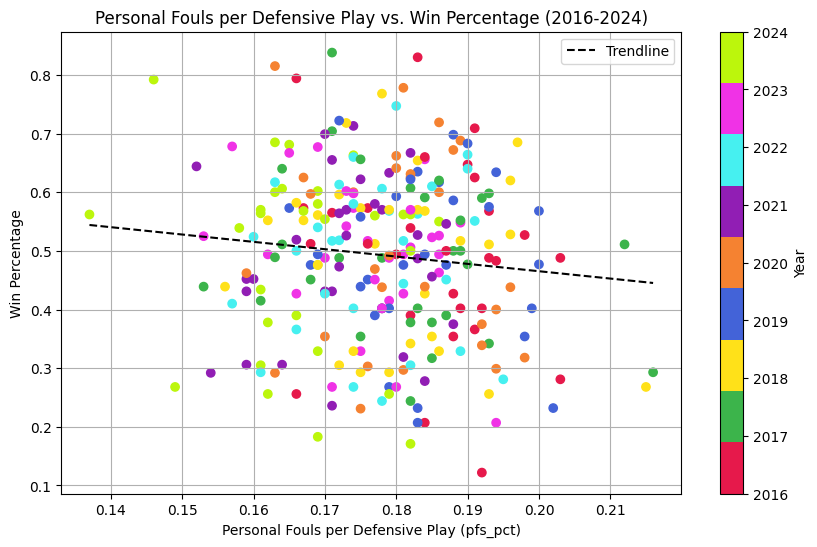

In [48]:
# Filter data for years 2016-2024 (three-point revolution)
pfs_pct_data['Year'] = pfs_pct_data['Year'].astype(int)
pfs_pct_data = pfs_pct_data[pfs_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(pfs_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
pfs_pct_data['year_color'] = pfs_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    pfs_pct_data['pfs_pct'], 
    pfs_pct_data['win_pct'], 
    c=pfs_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(pfs_pct_data['pfs_pct'])
sorted_pfs_pct = pfs_pct_data['pfs_pct'].values[sorted_indices]
sorted_win_pct = pfs_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_pfs_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_pfs_pct, p(sorted_pfs_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Personal Fouls per Defensive Play (pfs_pct)')
plt.ylabel('Win Percentage')
plt.title('Personal Fouls per Defensive Play vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 14: Shooting Percentage

In [50]:

sht_pct_dir = '../Cleaned_Data/sht_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'sht_pct' directory
team_files = [f for f in os.listdir(sht_pct_dir) if f.endswith('.csv')]

sht_pct_data = pd.DataFrame()

# Combine sht_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    sht_pct_file = os.path.join(sht_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both sht_pct and win_pct files
    sht_pct_year = pd.read_csv(sht_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    sht_pct_year = sht_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'sht_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(sht_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    sht_pct_data = pd.concat([sht_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(sht_pct_data.head(5))

# Pearson correlation coefficient
correlation = sht_pct_data['sht_pct'].corr(sht_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  sht_pct  win_pct    Team
0  2008    0.468    0.581  Denver
1  2018    0.470    0.561  Denver
2  2010    0.468    0.625  Denver
3  2009    0.471    0.653  Denver
4  2007    0.463    0.529  Denver
Pearson Correlation Coefficient: 0.52701


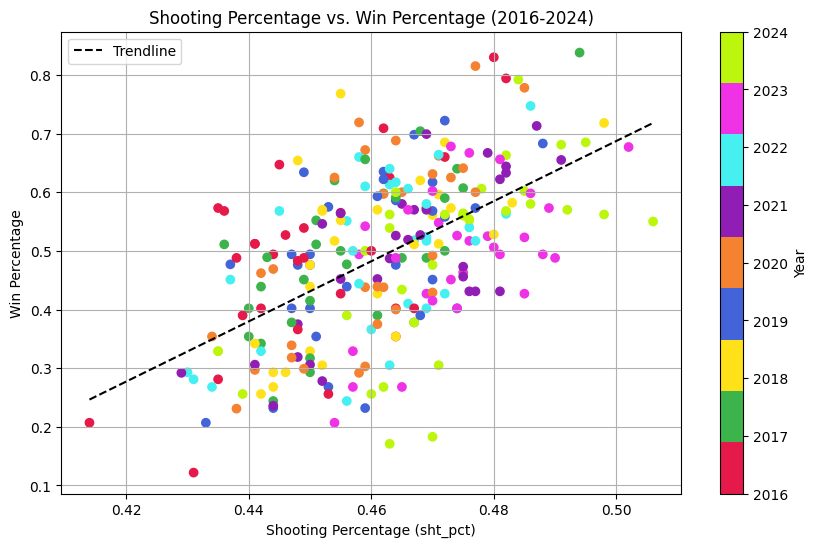

In [51]:
# Filter data for years 2016-2024 (three-point revolution)
sht_pct_data['Year'] = sht_pct_data['Year'].astype(int)
sht_pct_data = sht_pct_data[sht_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(sht_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
sht_pct_data['year_color'] = sht_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    sht_pct_data['sht_pct'], 
    sht_pct_data['win_pct'], 
    c=sht_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(sht_pct_data['sht_pct'])
sorted_sht_pct = sht_pct_data['sht_pct'].values[sorted_indices]
sorted_win_pct = sht_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_sht_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_sht_pct, p(sorted_sht_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Shooting Percentage (sht_pct)')
plt.ylabel('Win Percentage')
plt.title('Shooting Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 15: Steals Per Defensive Play

In [52]:

stls_pdp_dir = '../Cleaned_Data/stls_pdp'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'stls_pdp' directory
team_files = [f for f in os.listdir(stls_pdp_dir) if f.endswith('.csv')]

stls_pdp_data = pd.DataFrame()

# Combine stls_pdp and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    stls_pdp_file = os.path.join(stls_pdp_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both stls_pdp and win_pct files
    stls_pdp_year = pd.read_csv(stls_pdp_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    stls_pdp_year = stls_pdp_year[['Year', 'Statistic']].rename(columns={'Statistic': 'stls_pdp'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(stls_pdp_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    stls_pdp_data = pd.concat([stls_pdp_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(stls_pdp_data.head(5))

# Pearson correlation coefficient
correlation = stls_pdp_data['stls_pdp'].corr(stls_pdp_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  stls_pdp  win_pct    Team
0  2012     0.073    0.562  Denver
1  2006     0.077    0.517  Denver
2  2007     0.072    0.529  Denver
3  2021     0.071    0.622  Denver
4  2016     0.068    0.402  Denver
Pearson Correlation Coefficient: 0.15738


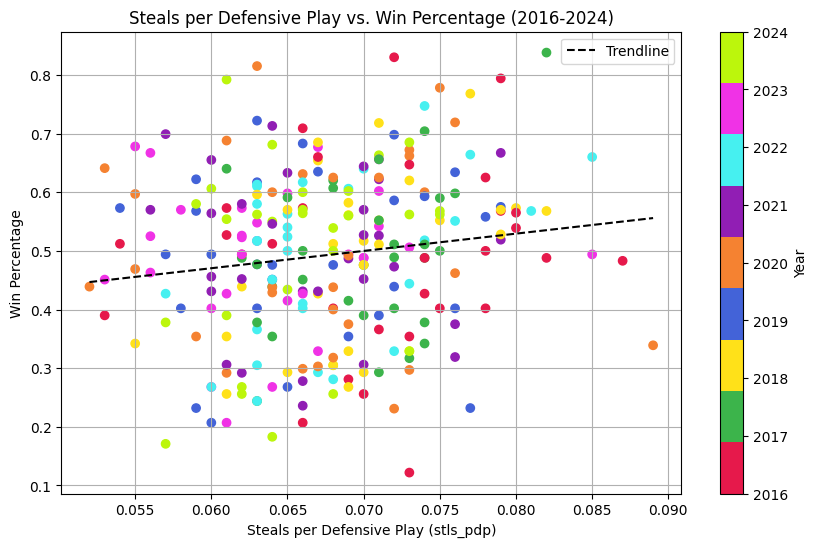

In [53]:
# Filter data for years 2016-2024 (three-point revolution)
stls_pdp_data['Year'] = stls_pdp_data['Year'].astype(int)
stls_pdp_data = stls_pdp_data[stls_pdp_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(stls_pdp_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
stls_pdp_data['year_color'] = stls_pdp_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    stls_pdp_data['stls_pdp'], 
    stls_pdp_data['win_pct'], 
    c=stls_pdp_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(stls_pdp_data['stls_pdp'])
sorted_stls_pdp = stls_pdp_data['stls_pdp'].values[sorted_indices]
sorted_win_pct = stls_pdp_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_stls_pdp, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_stls_pdp, p(sorted_stls_pdp), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Steals per Defensive Play (stls_pdp)')
plt.ylabel('Win Percentage')
plt.title('Steals per Defensive Play vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()

# Metric 16: Turnover Percentage

In [54]:

tov_pct_dir = '../Cleaned_Data/tov_pct'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'tov_pct' directory
team_files = [f for f in os.listdir(tov_pct_dir) if f.endswith('.csv')]

tov_pct_data = pd.DataFrame()

# Combine tov_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    tov_pct_file = os.path.join(tov_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both tov_pct and win_pct files
    tov_pct_year = pd.read_csv(tov_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    tov_pct_year = tov_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'tov_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(tov_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    tov_pct_data = pd.concat([tov_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(tov_pct_data.head(5))

# Pearson correlation coefficient
correlation = tov_pct_data['tov_pct'].corr(tov_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  tov_pct  win_pct    Team
0  2012    0.136    0.562  Denver
1  2007    0.142    0.529  Denver
2  2014    0.139    0.439  Denver
3  2021    0.118    0.622  Denver
4  2005    0.132    0.575  Denver
Pearson Correlation Coefficient: -0.30375


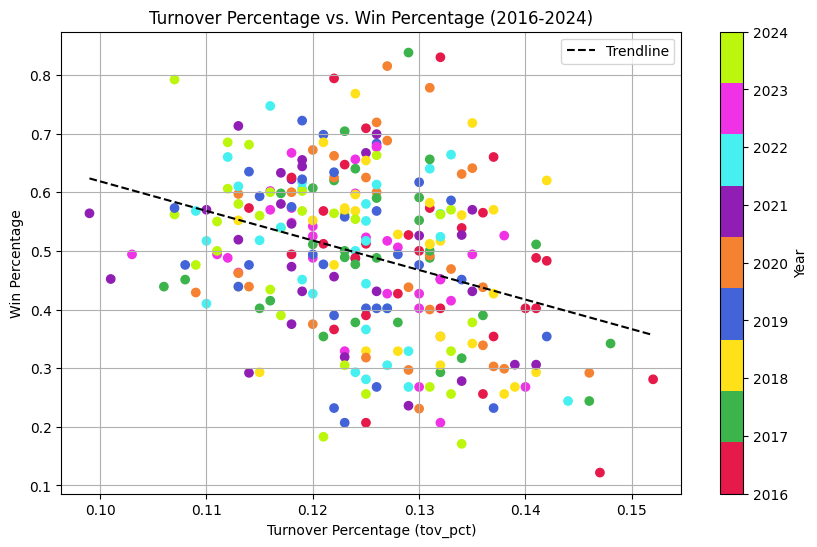

In [55]:
# Filter data for years 2016-2024 (three-point revolution)
tov_pct_data['Year'] = tov_pct_data['Year'].astype(int)
tov_pct_data = tov_pct_data[tov_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(tov_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
tov_pct_data['year_color'] = tov_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    tov_pct_data['tov_pct'], 
    tov_pct_data['win_pct'], 
    c=tov_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(tov_pct_data['tov_pct'])
sorted_tov_pct = tov_pct_data['tov_pct'].values[sorted_indices]
sorted_win_pct = tov_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_tov_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_tov_pct, p(sorted_tov_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Turnover Percentage (tov_pct)')
plt.ylabel('Win Percentage')
plt.title('Turnover Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()